# **Prepoznavac govora**

In [ ]:
import numpy as np
import scipy.io.wavfile as wf
from tkinter import *
from tkinter.ttk import *
from tkinter import messagebox
import matplotlib.pyplot as plt


In [ ]:
!pip install -q omegaconf torchaudio pydub

import os
from os.path import exists

if not exists('silero-models'):
  !git clone -q --depth 1 https://github.com/snakers4/silero-models

%cd silero-models

# silero imports
import torch
import random
from glob import glob
from omegaconf import OmegaConf

from colab_utils import record_audio
                         

# imports for uploading/recording
import numpy as np
import ipywidgets as widgets
from scipy.io import wavfile
from IPython.display import Audio, display, clear_output
from torchaudio.functional import vad

import scipy.io.wavfile as wf


/content/silero-models


In [ ]:

#Slusamo komandu prvih 5-10s. U koliko u tom periodu ne utvrdimo da je korisnik izgovorio nesto, 
#vracamo informaciju o ne razumevanju ulaza. U slucaju da u prvih 5-10s detektujemo neki glas, 
#pustamo korisnika da zavrsi svoju komandu i Text to Speech modelu prosledjujemo ulaz.





def _record_audio(b):
  clear_output()
  audio = record_audio(record_seconds)
  wavfile.write('recorded.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  display(Audio(audio, rate=sample_rate, autoplay=True))
  wavfile.write('test.wav', sample_rate, (32767*audio).numpy().astype(np.int16))
  openFile('/content/silero-models/recorded.wav')


def openFile(path):

    try:
        samplerate,data = wf.read(path)
        cutFile(samplerate,data)

    except:
        print(f'File {path} not found')


    

def cutFile(samplerate,data):



    #print(self.samplerate)

    T = [i /samplerate for i in range(0, len(data))]#vreme izmedju svakog pojedinacnog sempla
    

    #print(self.T)

    noiseArea = int(samplerate * 0.1)
    noise = np.abs(data[:noiseArea])
    L = np.mean(noise) + 2 * np.std(noise)


    # L - average noise
    # N - number of samples in window
    N = int(samplerate * 0.01)
   

    length = len(data)

    words = [1 if np.mean(np.abs(data[i:i+N])) > L else 0 for i in range(0, length, N)]


    
  
    


    flattenup(words, 12)

    flattendown(words, 20)

    
    global shum


    try:
        words.index(1)
        shum = False

    except:
        print('SUM')
        shum = True
        #self.drawNoise()


    # self.window_function()




def flattenup(words, p):
    curr_len = 0
    index = 0
    for i in words:
        if i == 0:
            curr_len += 1
        else:
            if p > curr_len > 0:
                for j in range(index - curr_len, index):
                    words[j] = 1
            curr_len = 0
        index += 1
    

    
def flattendown(words, q):
    curr_len = 0
    index = 0
    for i in words:
        if i == 1:
            curr_len += 1
        else:
            if q > curr_len > 0:
                for j in range(index - curr_len, index):
                    words[j] = 0
            curr_len = 0
        index += 1
    



record_seconds = 5
sample_rate = 16000

button = widgets.Button(description="Record Speech")
button.on_click(_record_audio)
display(button)


Starting recording for 5 seconds...


<IPython.core.display.Javascript object>

Finished recording!


In [ ]:
SPEECH_FILE='/content/silero-models/recorded.wav'

In [ ]:
print(shum)

False


# **Speech-to-Text**

In [ ]:
import IPython
import requests
import torch
import torchaudio
import matplotlib

In [ ]:
!git clone https://github.com/IgnjatKrdzavac/AudioFilesDeepLearning.git

Cloning into 'AudioFilesDeepLearning'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 171 (delta 7), reused 74 (delta 0), pack-reused 53
Receiving objects: 100% (171/171), 23.10 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
!pip install datasets==1.4.1
!pip install soundfile
!pip install jiwer
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 12.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.2
    Uninstalling huggingface-hub-0.0.2:
      Successfully uninstalled huggingface-hub-0.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

#ourdata = pd.read_csv("/content/AudioFilesDeepLearning/Audio Files.csv")
ourdata = pd.read_csv("/content/silero-models/AudioFilesDeepLearning/Audio Files.csv")
ourdata['file'] = ourdata['file'].map(lambda x: "/content/silero-models/AudioFilesDeepLearning"+x)
ourdata

,file,text
0,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
1,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
2,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
3,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
4,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
5,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Beogradu
6,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Londonu
7,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Londonu
8,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Londonu
9,/content/silero-models/AudioFilesDeepLearning/...,Kakvo je vreme u Londonu


In [ ]:
from datasets import Dataset

ourdataset =  Dataset.from_pandas(ourdata)
print(ourdataset)

Dataset({
    features: ['file', 'text'],
    num_rows: 40
})


In [ ]:
from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(ourdataset.remove_columns(["file"]), num_examples=5)

,text
0,Kakvo je vreme u Novom Sadu
1,Kakvo je vreme u Novom Sadu
2,Kakvo je vreme u Londonu
3,Kakvo je vreme u Beogradu
4,Kakvo je vreme u Beogradu


In [ ]:
import re
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"]'

def remove_special_characters(batch):
    batch["text"] = re.sub(chars_to_ignore_regex, '', batch["text"]).lower() + " "
    return batch

In [ ]:
ourdataset = ourdataset.map(remove_special_characters)

In [ ]:
show_random_elements(ourdataset.remove_columns(["file"]), num_examples=5)

,text
0,kakvo je vreme u londonu
1,kakvo je vreme u beogradu
2,kakvo je vreme u beogradu
3,kakvo je vreme u londonu
4,treniram svako jutro i osecam se sjajno povodom toga


In [ ]:
def extract_all_chars(batch):
  all_text = " ".join(batch["text"])
  vocab = list(set(all_text))
  return {"vocab": [vocab], "all_text": [all_text]}

In [ ]:
vocabs = ourdataset.map(extract_all_chars, batched=True, batch_size=1, keep_in_memory=True)
vocabs

Dataset({
    features: ['all_text', 'file', 'text', 'vocab'],
    num_rows: 40
})

In [ ]:
vocab_listBgd = list(set("kakvo je vreme u beogradu"))
vocab_listLdn = list(set("kakvo je vreme u novom sadu"))
vocab_listNsd = list(set("kakvo je vreme u londonu"))



vocab_listsadness2= list(set("osecam se jadno i nju nije briga"))


vocab_joy = list(set("treniram svako jutro i osecam se sjajno povodom toga"))


vocab_listfear2  = list(set("osecam se stidljivo zbog onoga sto nosim"))




in_first = set(vocab_listBgd)
in_second = set(vocab_listLdn)
in_third = set(vocab_listNsd)

in_second_but_not_in_first = in_second - in_first

resultBgd_Ldn = vocab_listBgd + list(in_second_but_not_in_first)

in_firstAndSecond = set(resultBgd_Ldn)

in_third_but_not_in_firstAndSecond = in_third - in_firstAndSecond

resultBLNS = resultBgd_Ldn + list(in_third_but_not_in_firstAndSecond)






in_fear2 = set(vocab_listfear2)


in_joy = set(vocab_joy)

in_sadness = set(vocab_listsadness2)









 

resultBLNS.append('i')
resultBLNS.append('c')
resultBLNS.append('j')
resultBLNS.append('z')
resultBLNS.append('t')


print(resultBLNS)
print(in_joy)

resultBLNS.append('p')

print(resultBLNS)

['a', 'k', 'g', 'r', 'd', 'u', 'e', 'b', 'v', 'j', ' ', 'm', 'o', 'n', 's', 'l', 'i', 'c', 'j', 'z', 't']
{'a', 'k', 'g', 'p', 'r', 's', 'u', 'd', 'e', 'i', 'n', 't', 'v', 'c', 'j', ' ', 'm', 'o'}
['a', 'k', 'g', 'r', 'd', 'u', 'e', 'b', 'v', 'j', ' ', 'm', 'o', 'n', 's', 'l', 'i', 'c', 'j', 'z', 't', 'p']


In [ ]:
vocab_dict = {v: k for k, v in enumerate(resultBLNS)}
vocab_dict

{'a': 0,
 'k': 1,
 'g': 2,
 'r': 3,
 'd': 4,
 'u': 5,
 'e': 6,
 'b': 7,
 'v': 8,
 'j': 18,
 ' ': 10,
 'm': 11,
 'o': 12,
 'n': 13,
 's': 14,
 'l': 15,
 'i': 16,
 'c': 17,
 'z': 19,
 't': 20,
 'p': 21}

In [ ]:
vocab_dict["|"] = vocab_dict[" "]
del vocab_dict[" "]

In [ ]:
vocab_dict["[UNK]"] = len(vocab_dict)
vocab_dict["[PAD]"] = len(vocab_dict)
len(vocab_dict)

23

In [ ]:
# import json
# with open('vocab.json', 'w') as vocab_file:
#     json.dump(vocab_dict, vocab_file)

In [ ]:
from transformers import Wav2Vec2CTCTokenizer

tokenizer = Wav2Vec2CTCTokenizer("/content/drive/MyDrive/wav2vec2-base-mine/vocab.json", unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")
#tokenizer = Wav2Vec2CTCTokenizer("./vocab.json", unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")

In [ ]:
# tokenizer.save_pretrained("/content/drive/MyDrive/wav2vec2-base-mine/")

('/content/drive/MyDrive/wav2vec2-base-mine/tokenizer_config.json',
 '/content/drive/MyDrive/wav2vec2-base-mine/special_tokens_map.json',
 '/content/drive/MyDrive/wav2vec2-base-mine/vocab.json',
 '/content/drive/MyDrive/wav2vec2-base-mine/added_tokens.json')

## **Feature extraction**

In [ ]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=False)
#feature_extractor.save_pretrained("/content/drive/MyDrive/testmodel/")
#feature_extractor.save_pretrained("/content/drive/MyDrive/wav2vec2-base-mine/")

In [ ]:
from transformers import Wav2Vec2Processor

processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

#processor.save_pretrained("/content/drive/MyDrive/wav2vec2-base-mine/")

In [ ]:
ourdataset[0]

{'file': '/content/silero-models/AudioFilesDeepLearning/audio/vremeBeogradM1-1.wav',
 'text': 'kakvo je vreme u beogradu '}

In [ ]:
import librosa

def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = librosa.load(batch["file"], sr=16000)
    batch["speech"] = speech_array
    batch["sampling_rate"] = sampling_rate
    batch["target_text"] = batch["text"]
    return batch

In [ ]:
ourdataset = ourdataset.map(speech_file_to_array_fn, num_proc=4)

In [ ]:
import IPython.display as ipd
import numpy as np
import random

rand_int = random.randint(0, len(ourdataset)-1)
print(ourdataset[rand_int])
ipd.Audio(data=np.asarray(ourdataset[rand_int]["speech"]), rate=ourdataset[rand_int]["sampling_rate"])

{'file': '/content/silero-models/AudioFilesDeepLearning/audio/vremeLondonM1-1.wav', 'sampling_rate': 16000, 'speech': [-1.1249923772993498e-05, -3.0823553970549256e-05, -3.21356528729666e-05, 1.0758417374745477e-05, -1.0142151950276457e-05, -4.149670076003531e-06, 3.74228366126772e-05, 2.673904236871749e-05, 3.2500862289452925e-05, -8.9290551841259e-06, -3.312076660222374e-05, -2.866351314878557e-05, 5.71257078263443e-06, -2.2564211121789413e-06, -3.817225297098048e-05, -2.463548480591271e-05, -3.512979674269445e-05, 1.1025469575542957e-05, -6.527597179228906e-06, -3.443139939918183e-05, 1.0816989743034355e-05, 3.0449808036792092e-05, 3.243180981371552e-05, -1.1014533811248839e-05, 2.0680949091911316e-05, 3.3047431315935683e-06, -3.417405969230458e-05, -1.7282123735640198e-05, -3.568653482943773e-05, 1.1190839359187521e-05, 3.1331906939158216e-05, 3.0030467314645648e-05, -7.187978098954773e-06, -3.477104110061191e-05, -2.7211897759116255e-05, -3.393872611923143e-05, -2.6297882868675515

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rand_int = random.randint(0, len(ourdataset)-1)

print("Target text:", ourdataset[rand_int]["target_text"])
print("Input array shape:", np.asarray(ourdataset[rand_int]["speech"]).shape)
print("Sampling rate:", ourdataset[rand_int]["sampling_rate"])

Target text: kakvo je vreme u beogradu 
Input array shape: (53120,)
Sampling rate: 16000


In [ ]:
# def prepare_dataset(batch):
#     # check that all files have the correct sampling rate
#     assert (
#         len(set(batch["sampling_rate"])) == 1
#     ), f"Make sure all inputs have the same sampling rate of {processor.feature_extractor.sampling_rate}."

#     batch["input_values"] = processor(batch["speech"], sampling_rate=batch["sampling_rate"][0]).input_values
    
#     with processor.as_target_processor():
#         batch["labels"] = processor(batch["target_text"]).input_ids
#     return batch

In [ ]:
# ourdataset_prepared = ourdataset.map(prepare_dataset, batch_size=1, num_proc=4, batched=True)

/usr/local/lib/python3.8/dist-packages/transformers/feature_extraction_utils.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.8/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


In [ ]:
import torch

In [ ]:


from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lenghts and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                max_length=self.max_length_labels,
                pad_to_multiple_of=self.pad_to_multiple_of_labels,
                return_tensors="pt",
            )

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [ ]:
# data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [ ]:
from datasets import load_metric
wer_metric = load_metric("wer")

In [ ]:
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # we do not want to group tokens when computing the metrics
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [ ]:
from transformers import Wav2Vec2ForCTC

# model = Wav2Vec2ForCTC.from_pretrained(
#     "facebook/wav2vec2-base", 
#     gradient_checkpointing=True, 
#     ctc_loss_reduction="mean", 
#     pad_token_id=processor.tokenizer.pad_token_id,
# )

In [ ]:
# model.freeze_feature_extractor()

/usr/local/lib/python3.8/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1635: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5.Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [ ]:
# from transformers import TrainingArguments

# training_args = TrainingArguments(
#   # output_dir="/content/drive/MyDrive/wav2vec2-base-timit-demo",
#   # output_dir="/content/drive/MyDrive/wav2vec2-base-mine/",
#   #output_dir="/content/drive/MyDrive/testmodel/",
#   group_by_length=True,
#   per_device_train_batch_size=1,
#   evaluation_strategy="steps",
#   num_train_epochs=500,
#   fp16=True,
#   save_steps=500,
#   eval_steps=500,
#   logging_steps=100,
#   learning_rate=1e-4,
#   weight_decay=0.005,
#   warmup_steps=100,
#   save_total_limit=20,
# )

In [ ]:
# from transformers import Trainer

# trainer = Trainer(
#     model=model,
#     data_collator=data_collator,
#     args=training_args,
#     compute_metrics=compute_metrics,
#     train_dataset=ourdataset_prepared,
#     eval_dataset=ourdataset_prepared,
#     tokenizer=processor.feature_extractor,
# )

Using cuda_amp half precision backend


In [ ]:
# trainer.train()

The following columns in the training set don't have a corresponding argument in `Wav2Vec2ForCTC.forward` and have been ignored: file, text, speech, sampling_rate, target_text. If file, text, speech, sampling_rate, target_text are not expected by `Wav2Vec2ForCTC.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 40
  Num Epochs = 500
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 20000
  Number of trainable parameters = 90195872


Step,Training Loss,Validation Loss,Wer
500,1.095400,0.452158,0.513725
1000,0.139500,0.038263,0.035294
1500,0.074000,4.524259,0.196078
2000,0.017000,0.002135,0.000000
2500,0.062400,0.008343,0.003922
3000,0.098300,0.025723,0.023529
3500,0.054900,0.030216,0.019608
4000,0.041000,0.012242,0.007843
4500,0.088200,0.009893,0.007843
5000,0.007500,0.044577,0.035294


The following columns in the evaluation set don't have a corresponding argument in `Wav2Vec2ForCTC.forward` and have been ignored: file, text, speech, sampling_rate, target_text. If file, text, speech, sampling_rate, target_text are not expected by `Wav2Vec2ForCTC.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 40
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/wav2vec2-base-mine/checkpoint-500
Configuration saved in /content/drive/MyDrive/wav2vec2-base-mine/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/wav2vec2-base-mine/checkpoint-500/pytorch_model.bin
Feature extractor saved in /content/drive/MyDrive/wav2vec2-base-mine/checkpoint-500/preprocessor_config.json
/usr/local/lib/python3.8/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument

TrainOutput(global_step=20000, training_loss=0.09943914846202824, metrics={'train_runtime': 2989.4675, 'train_samples_per_second': 6.69, 'train_steps_per_second': 6.69, 'total_flos': 5.6072603473632e+17, 'train_loss': 0.09943914846202824, 'epoch': 500.0})

In [ ]:
def map_to_result(batch):
  model.to("cuda")
  input_values = processor(
      batch["speech"], 
      sampling_rate=batch["sampling_rate"], 
      return_tensors="pt"
  ).input_values.to("cuda")

  with torch.no_grad():
    logits = model(input_values).logits

  pred_ids = torch.argmax(logits, dim=-1)
  batch["pred_str"] = processor.batch_decode(pred_ids)[0]
  
  return batch

In [ ]:
# results = ourdataset.map(map_to_result)

In [ ]:
# print("Test WER: {:.3f}".format(wer_metric.compute(predictions=results["pred_str"], references=results["target_text"])))

Test WER: 0.024


In [ ]:
# show_random_elements(results.remove_columns(["speech", "sampling_rate"]))

,file,pred_str,target_text,text
0,/content/silero-models/AudioFilesDeepLearning/audio/joy1-Z.wav,treniram svako jutro i osecam se sjajno [UNK]ovodom toga,treniram svako jutro i osecam se sjajno povodom toga,treniram svako jutro i osecam se sjajno povodom toga
1,/content/silero-models/AudioFilesDeepLearning/audio/fear2-M.wav,osecam se stidljivo zbog onoga sto nosim,osecam se stidljivo zbog onoga sto nosim,osecam se stidljivo zbog onoga sto nosim
2,/content/silero-models/AudioFilesDeepLearning/audio/vremeNoviSadW1.wav,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu
3,/content/silero-models/AudioFilesDeepLearning/audio/vremeNoviSadIgnjat.wav,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu
4,/content/silero-models/AudioFilesDeepLearning/audio/joy1-M.wav,treniram svako jutro i osecam se sjajno [UNK]ovodom toga,treniram svako jutro i osecam se sjajno povodom toga,treniram svako jutro i osecam se sjajno povodom toga


In [ ]:
model = Wav2Vec2ForCTC.from_pretrained("/content/drive/MyDrive/wav2vec2-base-mine/checkpoint-20000")

In [ ]:
if(shum == False): 
  model.to("cuda")
  speech_array, sampling_rate = librosa.load(SPEECH_FILE, sr=16000)

  input_values = processor(
        speech_array, 
        sampling_rate=sampling_rate, 
        return_tensors="pt"
    ).input_values.to("cuda")


  logits = model(input_values).logits
  pred_ids = torch.argmax(logits, dim=-1)
  resultUlaza = processor.batch_decode(pred_ids)
  print(resultUlaza)
else:
  print("Glas nije detektovan, pokusajte ponovo")  

['stovadcam stnie vnriakvo ogecaenicsvakvo j nolj nikto njito novopo se ni ti bogo s']


In [ ]:
results1 = ourdataset.map(map_to_result)

In [ ]:
print("Test WER: {:.3f}".format(wer_metric.compute(predictions=results1["pred_str"], references=results1["target_text"])))

Test WER: 0.000


In [ ]:
show_random_elements(results1.remove_columns(["speech", "sampling_rate"]))

,file,pred_str,target_text,text
0,/content/silero-models/AudioFilesDeepLearning/audio/vremeLondonIgnjat.wav,kakvo je vreme u londonu,kakvo je vreme u londonu,kakvo je vreme u londonu
1,/content/silero-models/AudioFilesDeepLearning/audio/fear2-M.wav,osecam se stidljivo zbog onoga sto nosim,osecam se stidljivo zbog onoga sto nosim,osecam se stidljivo zbog onoga sto nosim
2,/content/silero-models/AudioFilesDeepLearning/audio/joy1-I.wav,treniram svako jutro i osecam se sjajno povodom toga,treniram svako jutro i osecam se sjajno povodom toga,treniram svako jutro i osecam se sjajno povodom toga
3,/content/silero-models/AudioFilesDeepLearning/audio/vremeNoviSadM1-2.wav,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu,kakvo je vreme u novom sadu
4,/content/silero-models/AudioFilesDeepLearning/audio/briga1Ignjat.wav,osecam se jadno i nju nije briga,osecam se jadno i nju nije briga,osecam se jadno i nju nije briga


# **Spoljasnji API**


In [ ]:
if("kakvo je vreme u novom sadu" in resultUlaza):     
  print("novi sad")
  flagNoviSad = 1
  flagBeograd = 0
  flagLondon = 0
elif("kakvo je vreme u beogradu" in resultUlaza):
  print("beograd")
  flagBeograd = 1
  flagLondon = 0
  flagNoviSad = 0
elif("kakvo je vreme u londonu" in resultUlaza):
  print("london")
  flagLondon = 1
  flagNoviSad = 0
  flagBeograd = 0

else:
  flagLondon = 0
  flagNoviSad = 0
  flagBeograd = 0

In [ ]:
import requests
import sys

flagNista = 0

# NOVI SAD: lat:45.267136, lon:19.833549
# BELGRADE: lat:44.8178131, lon:20.4568974
# LONDON: lat:51.5073219, lon:-0.1276474

# insert your real key here!
access_key = "52c092f9-69d6-405d-8d12-00e3c95d8c76"

headers = {
    "X-Meteum-API-Key": access_key
}
if(flagLondon == 1):
  query = """{
    weatherByPoint(request: { lat: 51.5073219, lon: -0.1276474}) {
      now {
        temperature
      }
    }
  }"""
elif(flagBeograd == 1):
  query = """{
    weatherByPoint(request: { lat: 44.786568, lon: 20.448921}) {
      now {
        temperature
      }
    }
  }"""

elif(flagNoviSad == 1):
  query = """{
    weatherByPoint(request: { lat: 45.267136, lon: 19.833549}) {
      now {
        temperature
      }
    }
  }"""
else:  
    flagNista = 1
    resultVreme = "Nepoznata komanda"
    
if(flagNista == 0):
  response = requests.post('https://api.meteum.ai/graphql/query', headers=headers, json={'query': query})


  splitted = response.text.split(":")
  splittedNmbr = splitted[4]
  if(splittedNmbr[1].isnumeric()):
    temperatura = splittedNmbr[0] +  splittedNmbr[1]
  else:
    temperatura = splittedNmbr[0]



if(flagBeograd == 1):
  resultVreme = f"U Beogradu je trenutno {temperatura} stepeni celzijusa"
elif(flagNoviSad == 1):
  resultVreme = f"U Novom Sadu je trenutno {temperatura} stepeni"
elif(flagLondon == 1):
  resultVreme = f"U Londonu je trenutno {temperatura} stepeni"

print(resultVreme)    

Nepoznata komanda


# **NLP Model**

## **Data processing**

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/emotions_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/emotions_dataset/val.txt
/content/drive/MyDrive/emotions_dataset/train.txt
/content/drive/MyDrive/emotions_dataset/test.txt


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from wordcloud import WordCloud
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/emotions_dataset/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
train_data = pd.read_csv("/content/drive/MyDrive/emotions_dataset/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
validation_data = pd.read_csv("/content/drive/MyDrive/emotions_dataset/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (16000, 2)
Test :  (2000, 2)
Validation :  (2000, 2)


In [ ]:
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
train_data['length'] = [len(x) for x in train_data['Comment']]
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


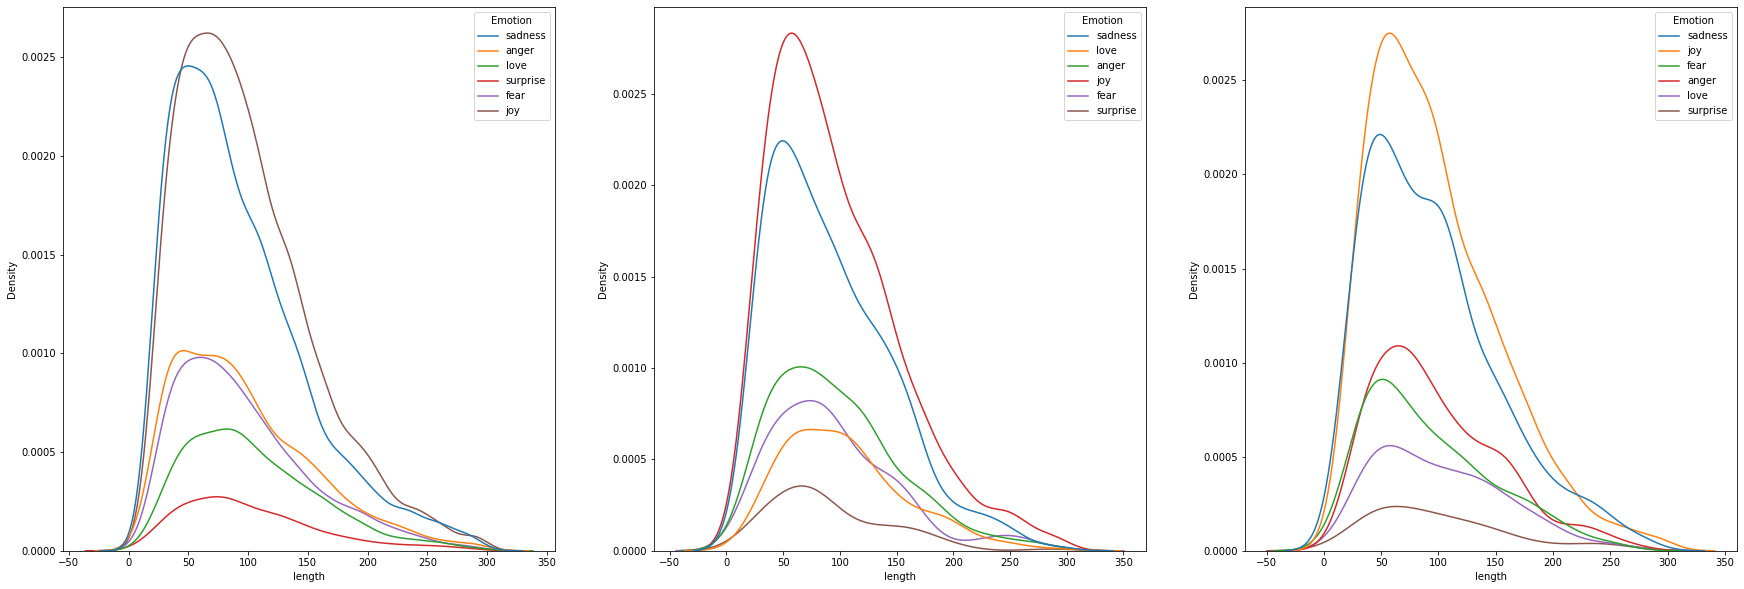

In [ ]:
all_data = {'Train Data': train_data, 'Validation Data': validation_data, 'Test Data': test_data}
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i, df in enumerate(all_data.values()):
    df2 = df.copy()
    df2['length'] = [len(x) for x in df2['Comment']]
    sns.kdeplot(data=df2,x='length',hue='Emotion', ax=ax[i])
plt.show()

In [ ]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
emotions_list = train_data['Emotion'].unique()
emotions_list

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

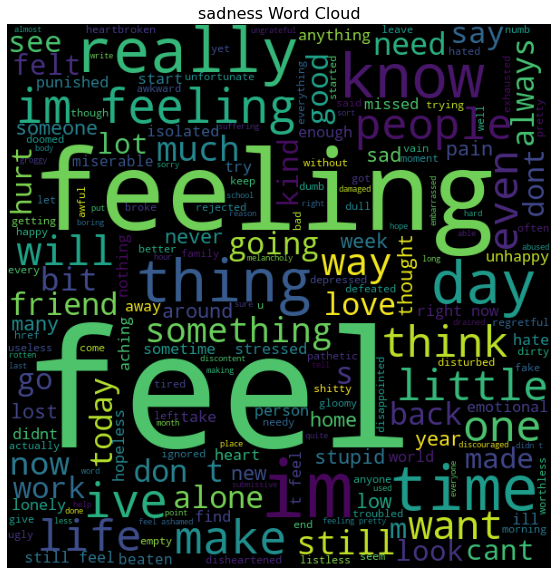

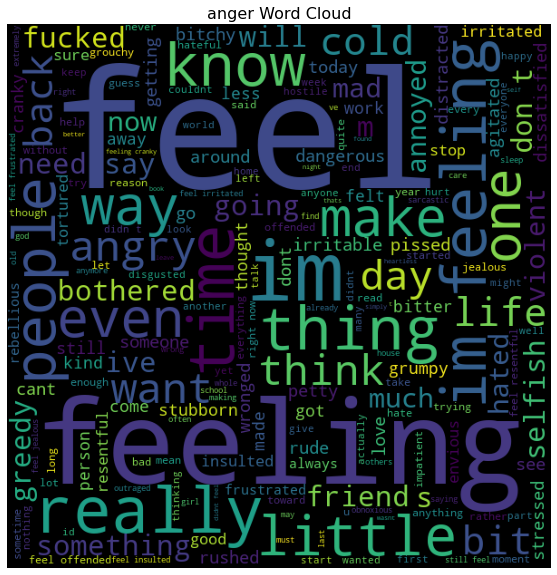

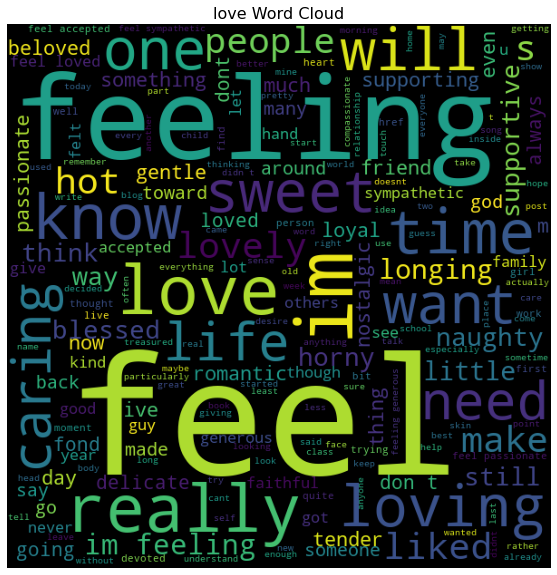

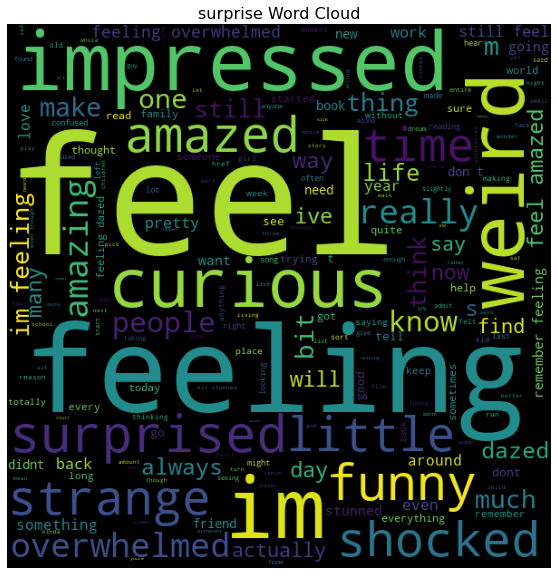

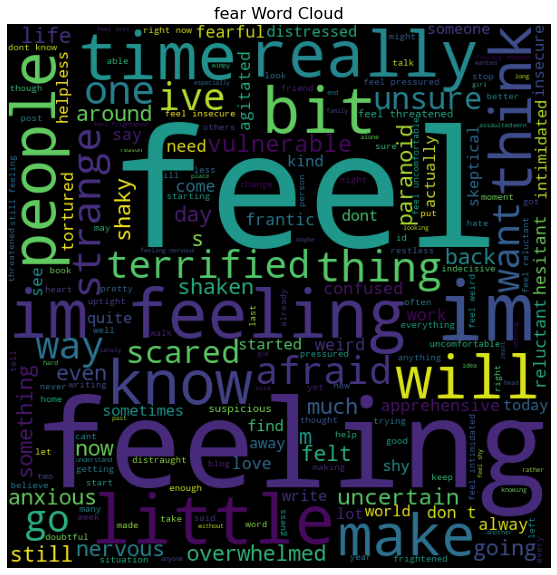

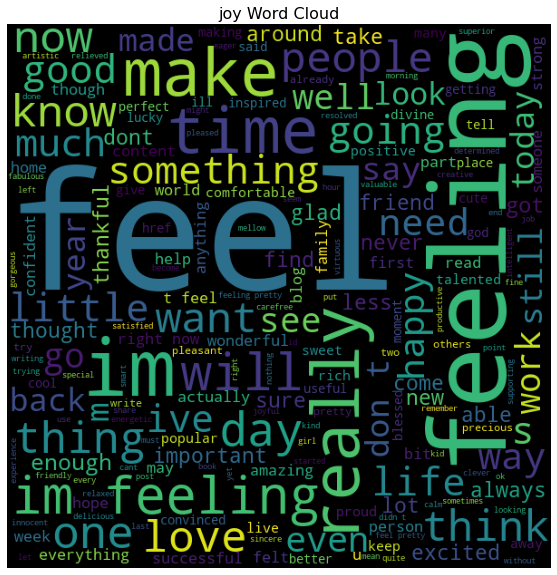

In [ ]:
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

## **Preprocessing**

In [ ]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])
test_data['Emotion'] = lb.fit_transform(test_data['Emotion'])
validation_data['Emotion'] = lb.fit_transform(validation_data['Emotion'])

In [ ]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
max_len=train_data['length'].max()
max_len

300

In [ ]:
vocabSize = 11000

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
def text_cleaning(df, column):
    """Removing unrelevent chars, Stemming and padding"""
    stemmer = PorterStemmer()
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    print(pad.shape)
    return pad

In [ ]:
x_train = text_cleaning(train_data, "Comment")
x_test = text_cleaning(test_data, "Comment")
x_val = text_cleaning(validation_data, "Comment")

(16000, 300)
(2000, 300)
(2000, 300)


In [ ]:
y_train = train_data["Emotion"]
y_test = test_data["Emotion"]
y_val = validation_data["Emotion"]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

## **Model building**

In [ ]:
modelNlp = Sequential()
modelNlp.add(Embedding(input_dim=vocabSize,output_dim=150,input_length=300))
modelNlp.add(Dropout(0.2))
modelNlp.add(LSTM(128))
modelNlp.add(Dropout(0.2))
modelNlp.add(Dense(64,activation='sigmoid'))
modelNlp.add(Dropout(0.2))
modelNlp.add(Dense(6,activation='softmax'))

In [ ]:
modelNlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
modelNlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 150)          1650000   
                                                                 
 dropout_3 (Dropout)         (None, 300, 150)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               142848    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                

In [ ]:
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [ ]:
hist = modelNlp.fit(x_train,y_train,epochs=10,batch_size=64,
                 validation_data=(x_val,y_val), verbose=1, callbacks=[callback])

Epoch 1/10
250/250 [==============================] - 5s 19ms/step - loss: 1.0287 - accuracy: 0.6133 - val_loss: 0.6220 - val_accuracy: 0.8010
Epoch 2/10
250/250 [==============================] - 5s 18ms/step - loss: 0.4103 - accuracy: 0.8701 - val_loss: 0.3798 - val_accuracy: 0.8745
Epoch 3/10
250/250 [==============================] - 4s 18ms/step - loss: 0.2469 - accuracy: 0.9204 - val_loss: 0.3364 - val_accuracy: 0.8880
Epoch 4/10
250/250 [==============================] - 5s 18ms/step - loss: 0.1653 - accuracy: 0.9439 - val_loss: 0.3314 - val_accuracy: 0.8905
Epoch 5/10
250/250 [==============================] - 4s 18ms/step - loss: 0.1389 - accuracy: 0.9526 - val_loss: 0.3389 - val_accuracy: 0.8965
Epoch 6/10
250/250 [==============================] - 5s 18ms/step - loss: 0.1121 - accuracy: 0.9621 - val_loss: 0.3380 - val_accuracy: 0.8910


In [ ]:
modelNlp.evaluate(x_val,y_val,verbose=1)

63/63 [==============================] - 1s 9ms/step - loss: 0.3314 - accuracy: 0.8905


[0.33140596747398376, 0.890500009059906]

In [ ]:
modelNlp.evaluate(x_test,y_test,verbose=1)

63/63 [==============================] - 1s 9ms/step - loss: 0.3297 - accuracy: 0.8830


[0.3296724259853363, 0.8830000162124634]

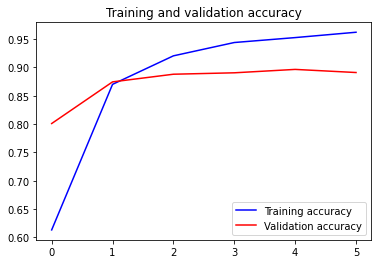

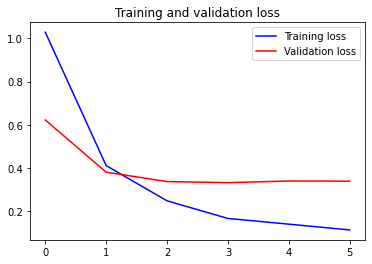

In [ ]:
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b', label='Training accuracy')
plt.plot(epochs,val_acc,'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'b', label='Training loss')
plt.plot(epochs,val_loss,'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    return pad

In [ ]:
flagRecenicaZaNLP = False


if(("osecam se stidljivo zbog onoga sto nosim" in resultUlaza)or("osecam se stidljivo zbog onoga sto nosi" in resultUlaza)):
  resultUlaza = "I feel shy because of what i am wearing"
  flagRecenicaZaNLP = True
elif(("treniram svako jutro  i osecam se sjajno povodom toga" in resultUlaza) or ("treniram svako jutro i osecam se sjajno povodom toga" in resultUlaza) or ("treniram svako jutro  i osecam se sjajno povodomtoga" in resultUlaza)):
  resultUlaza = "I workout every morning before and feel fabulous for it"
  flagRecenicaZaNLP = True
  
elif("osecam se jadno i nju nije briga" in resultUlaza):
  resultUlaza = "I feel miserable and she doesnt care"
  flagRecenicaZaNLP = True

print(flagRecenicaZaNLP)
print(resultUlaza)  
rezultatSaUlaza = resultUlaza

False
['stovadcam stnie vnriakvo ogecaenicsvakvo j nolj nikto njito novopo se ni ti bogo s']


In [ ]:
# sentences = [
#             "I workout every morning before and feel fabulous for it",
#             "I feel miserable and she doesnt care",
#             "I feel shy because of what i am wearing"
#             ]
# for sentence in sentences:

konacnaRecenica = "Nepoznata komanda"

if(flagRecenicaZaNLP is True):
  print(rezultatSaUlaza)
  rezultatSaUlazaC = sentence_cleaning(rezultatSaUlaza)
  result = lb.inverse_transform(np.argmax(modelNlp.predict(rezultatSaUlazaC), axis=-1))[0]
  proba =  np.max(modelNlp.predict(rezultatSaUlazaC))
  print(f"{result} : {proba}\n\n")
  
  if(result == 'joy'):
    konacnaRecenica = "U vasoj recenici je detektovana SRECA"
  elif(result == 'fear'):
    konacnaRecenica = "U vasoj recenici je detektovan STRAH"
  elif(result == 'sadness'):
    konacnaRecenica = "U vasoj recenici je detektovan TUGA"


print(konacnaRecenica)    

Nepoznata komanda
